In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.core.display_functions import display

In [11]:
df = pd.DataFrame(np.array([['SW', 2, 'F', 20],
                            ['Math', 3, 'M', 20],
                            ['Art', 3, 'F', 15],
                            ['English', 3, 'M', 28],
                            ['Math', 3, 'F', 26],
                            ['English', 3, 'M', 17],
                            ['Math', 3, 'F', 26],
                            ['SW', 3, 'F', 40],
                            ['SW', 3, 'M', 33],
                            ['English', 3, 'M', 18],
                            ['Math', 3, 'M', 25],
                            ['Math', 3, 'F', 30],
                            ['SW', 3, 'F', 45],
                            ['Art', 3, 'M', 20]]),
                  columns=['Major', 'Year', 'Gender', 'StudyHours'])
df['StudyHours'] = df['StudyHours'].astype(np.int64)

In [12]:
# Convert categorical features to numeric values using oneHotEncoder
df_copy = df.copy()

encoder = OneHotEncoder(sparse=False)
encoder.fit(df_copy[['Major']])
df_major = pd.DataFrame(encoder.transform(df[['Major']]),
                        columns=['Major_Art', 'Major_English', 'Major_Math', 'Major_SW'], dtype=np.int64)

encoder = LabelEncoder()
encoder.fit(df_copy['Gender'])
df_copy['Gender'] = encoder.transform(df['Gender'])  # Female=0, Male = 1
encoder.fit(df_copy['Year'])
df_copy['Year'] = encoder.transform(df['Year'])  # '2' = 0, '3' = 1

df_copy.drop(columns='Major', inplace=True)
df_copy = pd.concat([df_major, df_copy], axis=1)

In [13]:
# Split dataset to train and test sets
X = df_copy[['Major_Art', 'Major_English', 'Major_Math', 'Major_SW', 'Year', 'Gender']]
y = df_copy[['StudyHours']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42,
                                                    shuffle=True)

In [14]:
# Decision Tree regression
model = DecisionTreeRegressor(max_depth=5, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [15]:
# Show the result
y_pred_df = pd.DataFrame(y_pred, columns=['Prediction'])
y_test.reset_index(inplace=True)
y_test.drop(['index'], axis=1, inplace=True)
df_result = pd.concat([y_test, y_pred_df], axis=1)

df_result

,StudyHours,Prediction
0,18,22.5
1,30,26.0


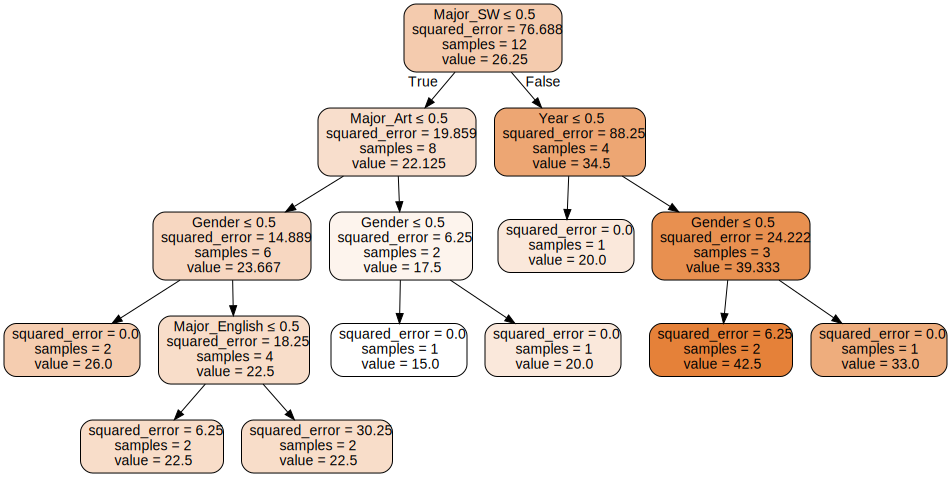

In [16]:
# visualization
dot_data = export_graphviz(model,   # Decision Tree Model Replacement
                               out_file = None,  # Convert to file?
                               feature_names = df_copy.columns[:-1],  # Feature name
                               class_names = df_copy.columns[-1],  # Target name
                               filled = True,           # Coloring or not
                               rounded = True,          # Rounding progress
                               special_characters = True)   # Whether to use special characters

display(graphviz.Source(dot_data))

[Text(0.5416666666666666, 0.9, 'Major_SW <= 0.5\nsquared_error = 76.688\nsamples = 12\nvalue = 26.25'),
 Text(0.3333333333333333, 0.7, 'Major_Art <= 0.5\nsquared_error = 19.859\nsamples = 8\nvalue = 22.125'),
 Text(0.16666666666666666, 0.5, 'Gender <= 0.5\nsquared_error = 14.889\nsamples = 6\nvalue = 23.667'),
 Text(0.08333333333333333, 0.3, 'squared_error = 0.0\nsamples = 2\nvalue = 26.0'),
 Text(0.25, 0.3, 'Major_English <= 0.5\nsquared_error = 18.25\nsamples = 4\nvalue = 22.5'),
 Text(0.16666666666666666, 0.1, 'squared_error = 6.25\nsamples = 2\nvalue = 22.5'),
 Text(0.3333333333333333, 0.1, 'squared_error = 30.25\nsamples = 2\nvalue = 22.5'),
 Text(0.5, 0.5, 'Gender <= 0.5\nsquared_error = 6.25\nsamples = 2\nvalue = 17.5'),
 Text(0.4166666666666667, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.5833333333333334, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.75, 0.7, 'Year <= 0.5\nsquared_error = 88.25\nsamples = 4\nvalue = 34.5'),
 Text(0.6666666

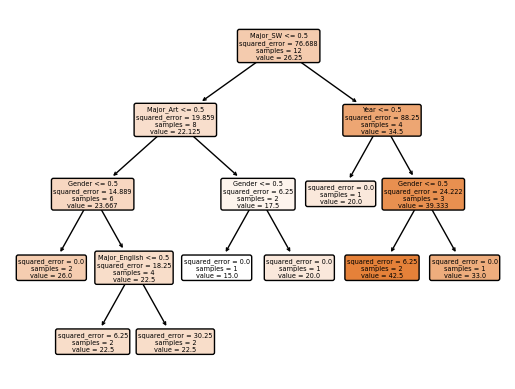

In [17]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=X.columns,  # Feature name
          class_names=y.columns,  # Target name
          filled=True,  # Coloring or not
          rounded=True)  # Rounding progress
